In [1]:
import pandas as pd
import numpy as np
import os
import sys
import glob
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
validation_data_path = ""

# Naive Data Visualization

In [7]:
# Visualize the current directory. 
print(os.getcwd())

/Users/Michavillson/Documents/PROJECTS/DS340W-Group10-FA19


In [34]:
# Define the input data paths, also define the variable for input data path so that it could be easily adapted after. 
avo_data_dir = "sources/ML_model/sample_data/avocado/npy"
cur_data_dir = "sources/ML_model/sample_data/curr_imputation/window_size_1000"
val_data_dir = "sources/ML_model/sample_data/valdiation/npy"
idea_data = "sources/ML_model/sample_data/IDEAS/1000.state"

In [35]:
# Showing statistics of each file dir. 
dir_list = [avo_data_dir, cur_data_dir, val_data_dir]
for dirt in dir_list: 
    print(len(list(os.listdir(dirt))))

30
30
30


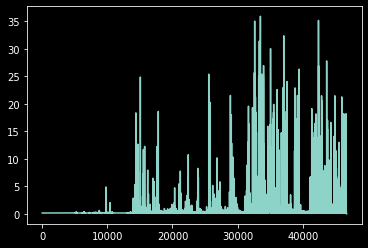

In [39]:
plt.plot(np.load(cur_data_dir + "/C12M03_training_21.npy"))
plt.show()

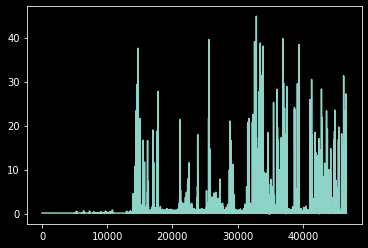

In [40]:
plt.plot(np.load(avo_data_dir + "/C12M03_1000.npy"))
plt.show()

In [45]:
sample_series_data = {
    "Avocado": list(np.load(avo_data_dir + "/C12M03_1000.npy")), 
    "Curr_Impute": list(np.load(cur_data_dir + "/C12M03_training_21.npy")), 
    "Validation": list(np.load(val_data_dir + "/C12M03_1000.npy"))
}

sample_df = pd.DataFrame(sample_series_data)

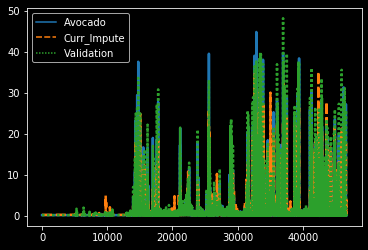

In [44]:
sns.lineplot(data=sample_df, palette="tab10", linewidth=2.5)

# Data Preparation
## Loading IDEAS State Data

In [58]:
ideas = pd.read_csv(idea_data, sep=" ", header=0)

In [59]:
ideas

,#ID,CHR,POSst,POSed,17,18,24,25,31,34,...,30,33,35,39,40,41,42,43,44,PosClass
0,R1,chr1,0,1000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
1,R2,chr1,1000,2000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
2,R3,chr1,2000,3000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
3,R4,chr1,3000,4000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
4,R5,chr1,4000,5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
5,R6,chr1,5000,6000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
6,R7,chr1,6000,7000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
7,R8,chr1,7000,8000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
8,R9,chr1,8000,9000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
9,R10,chr1,9000,10000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38


In [60]:
ideas_chr21 = ideas[ideas["CHR"] == "chr21"]
ideas_chr21.shape

(46710, 45)

In [98]:
ml_df = pd.DataFrame(columns=["avo", "cur", "cell", "mark", "ideas", "valid"])
chrom_size = 46710

for file_path in glob.glob(avo_data_dir + "/*.npy"): 
    curr_prefix, celltype, marktype = extract_prefix(file_path)
    try:
        temp_dict = {
            "avo": list(np.load(file_path)), 
            "cur": list(np.load(cur_data_dir+"/{}_training_21.npy".format(curr_prefix))), 
            "cell": [celltype for _ in range(chrom_size)], 
            "mark": [marktype for _ in range(chrom_size)],
            "ideas": ideas_chr21[celltype.split("C")[1]].tolist(),
            "valid": list(np.load(val_data_dir+"/{}_1000.npy".format(curr_prefix)))
        }
    except KeyError as e: 
        print("Error with {}".format(curr_prefix))
        print(str(e))
        continue
    except FileNotFoundError as e: 
        print("File not found: {}".format(str(e)))
        continue
    temp_df = pd.DataFrame(temp_dict)
    print(temp_df.shape)
    ml_df = ml_df.append(temp_df, ignore_index=True)

(46710, 6)
(46710, 6)
(46710, 6)
(46710, 6)
File not found: [Errno 2] No such file or directory: 'sources/ML_model/sample_data/valdiation/npy/C23M03_1000.npy'
(46710, 6)
(46710, 6)
(46710, 6)
(46710, 6)
(46710, 6)
Error with C12M21
'12'
(46710, 6)
Error with C12M03
'12'
(46710, 6)
(46710, 6)
Error with C12M25
'12'
(46710, 6)
(46710, 6)
(46710, 6)
(46710, 6)
(46710, 6)
(46710, 6)
(46710, 6)
(46710, 6)
(46710, 6)
(46710, 6)
(46710, 6)
(46710, 6)
(46710, 6)
(46710, 6)


In [100]:
ml_df

,avo,cur,cell,mark,ideas,valid
0,0.246995,1.801744e-01,C46,M03,0,0.226440
1,0.248117,1.801744e-01,C46,M03,92,0.226440
2,0.248174,1.801744e-01,C46,M03,0,0.226440
3,0.247927,1.801744e-01,C46,M03,0,0.226440
4,0.248312,1.801744e-01,C46,M03,0,0.226440
5,0.247233,1.801744e-01,C46,M03,19,0.226440
6,0.247316,1.801744e-01,C46,M03,19,0.226440
7,0.247123,1.801744e-01,C46,M03,43,0.226440
8,0.246343,1.801744e-01,C46,M03,19,0.226440
9,0.248208,1.801744e-01,C46,M03,0,0.226440


# Running ML Random Forest Classifier on the dataset. 

In [19]:
ml_df = pd.read_csv("sources/ML_model/output/ml_data.csv", header=0)

In [21]:
label = features["valid"].to_numpy()
features = features.drop(columns=["valid"]).to_numpy()

In [20]:
features = pd.get_dummies(ml_df) 
features.head(5)

,avo,cur,ideas,valid,cell_C17,cell_C18,cell_C23,cell_C24,cell_C25,cell_C27,cell_C31,cell_C32,cell_C34,cell_C46,mark_M03,mark_M21,mark_M25
0,0.246995,0.180174,0,0.22644,0,0,0,0,0,0,0,0,0,1,1,0,0
1,0.248117,0.180174,92,0.22644,0,0,0,0,0,0,0,0,0,1,1,0,0
2,0.248174,0.180174,0,0.22644,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0.247927,0.180174,0,0.22644,0,0,0,0,0,0,0,0,0,1,1,0,0
4,0.248312,0.180174,0,0.22644,0,0,0,0,0,0,0,0,0,1,1,0,0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [23]:
# Creating training and test dataset. 
train_features, test_features, train_labels, test_labels = train_test_split(features, label, test_size=0.25, random_state=42)

In [24]:
regr = RandomForestRegressor()
regr.fit(train_features, train_labels)

/Users/Michavillson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [25]:
# Making predictions
predictions = regr.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error for prediction:', round(np.mean(errors), 2))
print('Mean Absolute Error for avocado:', round(np.mean(abs(test_features[:,0] - test_labels)), 2))
print('Mean Absolute Error for curr impute:', round(np.mean(abs(test_features[:,1] - test_labels)), 2))

Mean Absolute Error for prediction: 0.14
Mean Absolute Error for avocado: 0.16
Mean Absolute Error for curr impute: 0.28


In [26]:
pred_plot = {
    "prediction": predictions, 
    "validation": test_labels, 
    "avocado": test_features[:,0],
    "curr_impute": test_features[:,1]
}

# sns.lineplot(data=pd.DataFrame(pred_plot), palette="tab10", linewidth=2.5)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3a8a7a90>,
      dtype=object)

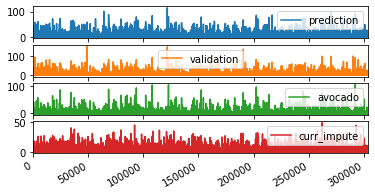

In [27]:
pred_plot = pd.DataFrame(pred_plot)
pred_plot.plot(subplots=True, figsize=(6, 3))

In [125]:
test_features[:,0]

array([0.20025825, 0.05342846, 0.31271985, ..., 0.16525064, 0.26461919,
       1.07688535])

## K-Fold Cross-Validation Approach to Validate the Accuracy Result

In [28]:
from sklearn.model_selection import KFold, cross_val_score
import time

In [30]:
start_time = time.time()
kfold = KFold(n_splits=5, random_state=42)
model_kfold = RandomForestRegressor()
results_kfold = cross_val_score(model_kfold, features, label, cv=kfold, scoring="neg_mean_squared_error")
end_time = time.time()

/Users/Michavillson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Michavillson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Michavillson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Michavillson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Michavill

In [31]:
print("Training Time: {}".format(end_time - start_time))
print(results_kfold)
print("Accuracy: {}".format(sum(results_kfold)/5))

Training Time: 276.46062707901
[-4.30568188 -0.41587104 -0.22945897 -1.38579289 -2.10461975]
Accuracy: -1.6882849073748745
